In [1]:
import pandas as pd
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import AgglomerativeClustering

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/firdthebird/Capstone/master/Cost_of_living_index.csv')
data = data[(data["City"]=="Austin, TX, United States")|  (data["City"]=="Seattle, WA, United States") | (data["City"]=="Chicago, IL, United States")]
data = data.set_index('City')
data

,Rank,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
City,,,,,,,
"Seattle, WA, United States",24,85.51,64.70,75.66,83.72,80.27,140.00
"Chicago, IL, United States",54,77.33,55.53,67.01,70.69,78.52,133.70
"Austin, TX, United States",143,70.49,50.35,60.96,65.81,78.34,151.25


In [3]:
data.drop(["Rank"], axis = 1, inplace = True) 
data

,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
City,,,,,,
"Seattle, WA, United States",85.51,64.70,75.66,83.72,80.27,140.00
"Chicago, IL, United States",77.33,55.53,67.01,70.69,78.52,133.70
"Austin, TX, United States",70.49,50.35,60.96,65.81,78.34,151.25


In [4]:
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,0.381366,0.288555,0.337436,0.373383,0.357996,0.624386
1,0.374700,0.269069,0.324695,0.342526,0.380466,0.647839
2,0.333912,0.238508,0.288768,0.311743,0.371097,0.716473


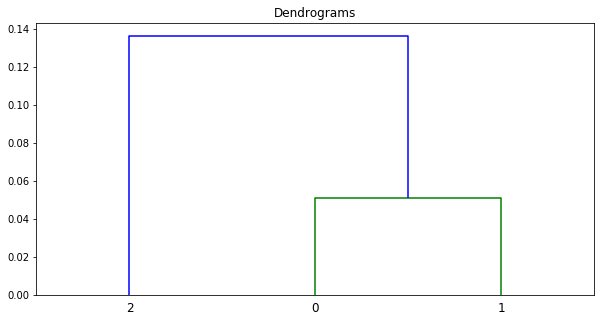

In [5]:
plt.figure(figsize=(10, 5))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

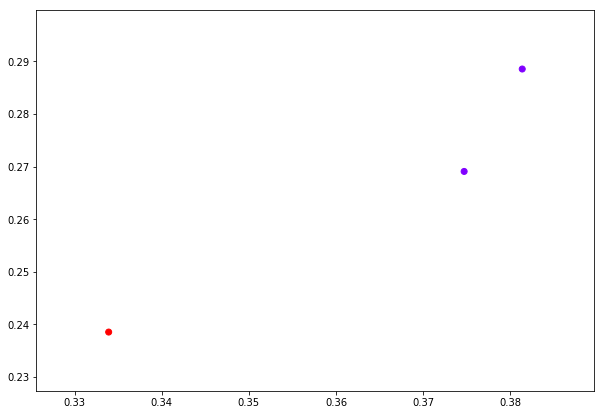

In [11]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)
#plt.figure(figsize=(10, 7))  
#plt.scatter(data_scaled['Cost of Living Plus Rent Index'], data_scaled['Restaurant Price Index'], c=cluster.labels_) 
plt.figure(figsize=(10, 7))
df =data_scaled.to_numpy()
plt.scatter(df[:,0], df[:,1], c=cluster.labels_, cmap='rainbow')